In [1]:
#Importing all the libraries 

%matplotlib inline 
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
from networkx.algorithms import community
from itertools import chain
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the gml file and printing its informations to see the number of nodes the number of 
edges and the average degree

g = nx.read_gml('football.gml')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [3]:
#reading the csv file exported from Gephi

df = pd.read_csv('/Users/giacomoflores/Desktop/Datavis/Project/collegefootball.csv', sep=';')

In [4]:
#Replacing the code of the conference with its name

df.loc[df['conference'] == 0, 'conference'] = 'Atlantic Coast'
df.loc[df['conference'] == 1, 'conference'] = 'Big East'
df.loc[df['conference'] == 2, 'conference'] = 'Big Ten'
df.loc[df['conference'] == 3, 'conference'] = 'Big Twelve'
df.loc[df['conference'] == 4, 'conference'] = 'Conference USA'
df.loc[df['conference'] == 5, 'conference'] = 'Independents'
df.loc[df['conference'] == 6, 'conference'] = 'Mid-American'
df.loc[df['conference'] == 7, 'conference'] = 'Mountain West'
df.loc[df['conference'] == 8, 'conference'] = 'Pacific Ten'
df.loc[df['conference'] == 9, 'conference'] = 'Southeastern'
df.loc[df['conference'] == 10, 'conference'] = 'Sun Belt'
df.loc[df['conference'] == 11, 'conference'] = 'Western Athletic'

df

Label        conference  degree  Eccentricity  \
0         BrighamYoung     Mountain West      12             3   
1         FloridaState    Atlantic Coast      12             4   
2                 Iowa           Big Ten      12             4   
3          KansasState        Big Twelve      12             3   
4            NewMexico     Mountain West      11             4   
..                 ...               ...     ...           ...   
110     TexasChristian    Conference USA      11             4   
111         California       Pacific Ten      11             4   
112  AlabamaBirmingham    Conference USA      10             4   
113           Arkansas      Southeastern      10             4   
114             Hawaii  Western Athletic      11             4   

     closness_centrality    betweeness  
0               0.423792  209267763,00  
1               0.413043  113497587,00  
2               0.407143   84522004,00  
3               0.420664  148594507,00  
4               0.402827   68685983,00  
..                   ...           ...  
110             0.413043   92559839,00  
111             0.382550   48409819,00  
112             0.395833   74596965,00  
113             0.377483    4185433,00  
114             0.413043   65996664,00  

[115 rows x 6 columns]

In [5]:
#Printing the name of every node in the network

g.nodes

NodeView(('BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCa

In [6]:
#Printing the conference where the college belongs

conference= g.nodes['Tulane']['value']
if conference== 0:
    print('Atlantic Coast')
elif conference== 1:
    print('Big East')
elif conference== 2:
    print('Big Ten')
elif conference== 3:
    print('Big Twelve')
elif conference== 4:
    print('Conference USA')
elif conference== 5:
    print('Independents')
elif conference== 6:
    print('Mid-American')
elif conference== 7:
    print('Mountain West')
elif conference== 8:
    print('Pacific Ten')
elif conference== 9:
    print('Southeastern')
elif conference== 10:
    print('Sun Belt')
else:
    print('Western Athletic')

Conference USA


In [7]:
#Printing the degree of every node in the network sorted 

sorted(g.degree, key=lambda x: x[1], reverse=True)

[('BrighamYoung', 12),
 ('FloridaState', 12),
 ('Iowa', 12),
 ('KansasState', 12),
 ('TexasTech', 12),
 ('PennState', 12),
 ('SouthernCalifornia', 12),
 ('Wisconsin', 12),
 ('SouthernMethodist', 12),
 ('Nevada', 12),
 ('Tulsa', 12),
 ('NevadaLasVegas', 12),
 ('NewMexico', 11),
 ('ArizonaState', 11),
 ('SanDiegoState', 11),
 ('Northwestern', 11),
 ('Wyoming', 11),
 ('Auburn', 11),
 ('Akron', 11),
 ('VirginiaTech', 11),
 ('Alabama', 11),
 ('UCLA', 11),
 ('Arizona', 11),
 ('Utah', 11),
 ('NorthCarolinaState', 11),
 ('Florida', 11),
 ('BostonCollege', 11),
 ('WestVirginia', 11),
 ('BowlingGreenState', 11),
 ('Michigan', 11),
 ('Buffalo', 11),
 ('Syracuse', 11),
 ('GeorgiaTech', 11),
 ('CentralMichigan', 11),
 ('Purdue', 11),
 ('Colorado', 11),
 ('EasternMichigan', 11),
 ('EastCarolina', 11),
 ('Duke', 11),
 ('FresnoState', 11),
 ('OhioState', 11),
 ('Houston', 11),
 ('Rice', 11),
 ('Washington', 11),
 ('Pittsburgh', 11),
 ('Minnesota', 11),
 ('MiamiOhio', 11),
 ('Vanderbilt', 11),
 ('Illin

In [8]:
#Printing the maximun degree of the network

degrees=[]

for v in g.nodes():
    degrees.append(g.degree(v))

print(max(degrees))

12


In [9]:
#Printing the degree of the selected node

print(g.degree(['Mississippi']))

[('Mississippi', 11)]


<AxesSubplot:ylabel='count'>

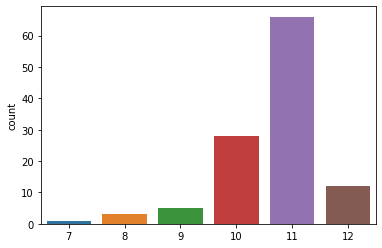

In [10]:
#Plotting the distribution of the degrees

sns.countplot(x=degrees)

In [54]:
fig=px.histogram(df, x= 'degree', text_auto='.2s',
            title="Number of nodes with certain degree")
fig.update_layout(bargap=0.01)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_html("/Users/giacomoflores/Desktop/Datavis/Project/histdegree.html")
fig.show()

In [12]:
fig = px.strip(df, y = 'conference', x = "degree")
fig.show()

In [13]:
fig = px.box(df, x="conference", y="degree",
             title="Box plot of the degrees of every conference",
             #color ="conference"
            )
fig.show()

In [14]:
fig = px.violin(df, y = "degree", x= 'conference')
fig.show()

In [15]:
fig = px.scatter(df, x="Label", y="degree", color = "conference")
fig.show()

In [16]:
#Checking if the network is bipartite

nx.is_bipartite(g)

False

In [18]:
#Checking if the network is connected

nx.is_connected(g)

True

In [19]:
#Checking if the network is biconnected

nx.is_biconnected(g)

True

In [21]:
#Checking if the network is directed

nx.is_directed(g)

False

In [57]:
#Printing the diameter of the network

nx.diameter(g)

4

In [58]:
#Printing the density of the network 

nx.density(g)

0.0935163996948894

In [59]:
#Printing the eccentricity of every node in the network  

nx.eccentricity(g)

{'BrighamYoung': 3,
 'FloridaState': 4,
 'Iowa': 4,
 'KansasState': 3,
 'NewMexico': 4,
 'TexasTech': 4,
 'PennState': 3,
 'SouthernCalifornia': 4,
 'ArizonaState': 4,
 'SanDiegoState': 4,
 'Baylor': 4,
 'NorthTexas': 4,
 'NorthernIllinois': 4,
 'Northwestern': 3,
 'WesternMichigan': 4,
 'Wisconsin': 3,
 'Wyoming': 3,
 'Auburn': 3,
 'Akron': 4,
 'VirginiaTech': 4,
 'Alabama': 4,
 'UCLA': 4,
 'Arizona': 4,
 'Utah': 4,
 'ArkansasState': 4,
 'NorthCarolinaState': 4,
 'BallState': 4,
 'Florida': 4,
 'BoiseState': 3,
 'BostonCollege': 4,
 'WestVirginia': 4,
 'BowlingGreenState': 4,
 'Michigan': 4,
 'Virginia': 4,
 'Buffalo': 4,
 'Syracuse': 4,
 'CentralFlorida': 4,
 'GeorgiaTech': 4,
 'CentralMichigan': 4,
 'Purdue': 3,
 'Colorado': 4,
 'ColoradoState': 4,
 'Connecticut': 4,
 'EasternMichigan': 4,
 'EastCarolina': 4,
 'Duke': 4,
 'FresnoState': 4,
 'OhioState': 4,
 'Houston': 4,
 'Rice': 4,
 'Idaho': 4,
 'Washington': 4,
 'Kansas': 4,
 'SouthernMethodist': 4,
 'Kent': 4,
 'Pittsburgh': 4,
 

In [56]:
#Checking if the node form a simple path 

nx.is_simple_path(g, 'Connecticut')

False

In [24]:
#Creating a dict able to compute the distance between two nodes 

distance = dict(nx.all_pairs_shortest_path_length(g))
distance["BrighamYoung"]["OhioState"]

3

In [25]:
#Printing the degree centrality of every node in the network

nx.degree_centrality(g)

{'BrighamYoung': 0.10526315789473684,
 'FloridaState': 0.10526315789473684,
 'Iowa': 0.10526315789473684,
 'KansasState': 0.10526315789473684,
 'NewMexico': 0.09649122807017543,
 'TexasTech': 0.10526315789473684,
 'PennState': 0.10526315789473684,
 'SouthernCalifornia': 0.10526315789473684,
 'ArizonaState': 0.09649122807017543,
 'SanDiegoState': 0.09649122807017543,
 'Baylor': 0.08771929824561403,
 'NorthTexas': 0.08771929824561403,
 'NorthernIllinois': 0.08771929824561403,
 'Northwestern': 0.09649122807017543,
 'WesternMichigan': 0.08771929824561403,
 'Wisconsin': 0.10526315789473684,
 'Wyoming': 0.09649122807017543,
 'Auburn': 0.09649122807017543,
 'Akron': 0.09649122807017543,
 'VirginiaTech': 0.09649122807017543,
 'Alabama': 0.09649122807017543,
 'UCLA': 0.09649122807017543,
 'Arizona': 0.09649122807017543,
 'Utah': 0.09649122807017543,
 'ArkansasState': 0.08771929824561403,
 'NorthCarolinaState': 0.09649122807017543,
 'BallState': 0.08771929824561403,
 'Florida': 0.096491228070175

In [26]:
#Creating a dict able to print the degree centrality of a selected node

degree_centrality = dict(nx.degree_centrality(g))
degree_centrality["BrighamYoung"]

0.10526315789473684

In [27]:
##Sorting the 5 nodes with the highest degree centrality 

sorted_deg_cen_g = sorted(degree_centrality.items(), key=lambda x:x[1], reverse = True)
print(sorted_deg_cen_g[0:5])

[('BrighamYoung', 0.10526315789473684), ('FloridaState', 0.10526315789473684), ('Iowa', 0.10526315789473684), ('KansasState', 0.10526315789473684), ('TexasTech', 0.10526315789473684)]


In [28]:
##Sorting the 5 nodes with the lowest degree centrality 

sorted_deg_cen_g = sorted(degree_centrality.items(), key=lambda x:x[1], reverse = True)
print(sorted_deg_cen_g[-6:-1])

[('Toledo', 0.07894736842105263), ('UtahState', 0.07894736842105263), ('CentralFlorida', 0.07017543859649122), ('LouisianaMonroe', 0.07017543859649122), ('LouisianaLafayette', 0.07017543859649122)]


In [29]:
#Printing the betweeness of every node in the network

nx.betweenness_centrality(g, normalized=False)

{'BrighamYoung': 209.26776269346655,
 'FloridaState': 113.49758677249373,
 'Iowa': 84.52200352114954,
 'KansasState': 148.59450673694255,
 'NewMexico': 68.68598312364387,
 'TexasTech': 68.66738559411384,
 'PennState': 126.76715262046375,
 'SouthernCalifornia': 93.80051474132921,
 'ArizonaState': 32.26070776888201,
 'SanDiegoState': 76.20444268829694,
 'Baylor': 44.49437315868631,
 'NorthTexas': 73.42964481984193,
 'NorthernIllinois': 65.33836570266206,
 'Northwestern': 111.37367185233812,
 'WesternMichigan': 45.566518652189885,
 'Wisconsin': 134.58640732508132,
 'Wyoming': 143.07681488091492,
 'Auburn': 106.93346012577992,
 'Akron': 54.703065933313475,
 'VirginiaTech': 62.85973333110557,
 'Alabama': 148.44135826684627,
 'UCLA': 142.5187650232883,
 'Arizona': 43.36419870360752,
 'Utah': 48.88291112453291,
 'ArkansasState': 133.33014685205086,
 'NorthCarolinaState': 114.54205771321412,
 'BallState': 109.51870608420414,
 'Florida': 68.6627428093362,
 'BoiseState': 117.046227340214,
 'Bost

In [30]:
#Printing the betweenness of the selected node

betweenness = dict(nx.betweenness_centrality(g, normalized=False))
betweenness["BrighamYoung"]

209.26776269346655

In [31]:
#Sorting the 5 nodes with the highest betweeness 

sorted_bw_cen_g = sorted(betweenness.items(), key=lambda x:x[1], reverse = True)
print(sorted_bw_cen_g[0:5])

[('NotreDame', 215.9857742762204), ('BrighamYoung', 209.26776269346655), ('Navy', 187.8263440748649), ('LouisianaTech', 185.64780565318569), ('CentralMichigan', 162.22819149436614)]


In [32]:
#Sorting the 5 nodes with the lowest betweeness 

sorted_bw_cen_g = sorted(betweenness.items(), key=lambda x:x[1], reverse = True)
print(sorted_bw_cen_g[-6:-1])

[('WashingtonState', 35.57265109977489), ('Rutgers', 34.24606230087306), ('ArizonaState', 32.26070776888201), ('WakeForest', 28.15932821394442), ('Kent', 25.158444355383814)]


In [33]:
#Printing the Clustering coefficient of every node

nx.clustering(g)

{'BrighamYoung': 0.3484848484848485,
 'FloridaState': 0.4393939393939394,
 'Iowa': 0.3787878787878788,
 'KansasState': 0.3333333333333333,
 'NewMexico': 0.41818181818181815,
 'TexasTech': 0.36363636363636365,
 'PennState': 0.3181818181818182,
 'SouthernCalifornia': 0.3939393939393939,
 'ArizonaState': 0.4727272727272727,
 'SanDiegoState': 0.4727272727272727,
 'Baylor': 0.4444444444444444,
 'NorthTexas': 0.3111111111111111,
 'NorthernIllinois': 0.3333333333333333,
 'Northwestern': 0.38181818181818183,
 'WesternMichigan': 0.37777777777777777,
 'Wisconsin': 0.3484848484848485,
 'Wyoming': 0.41818181818181815,
 'Auburn': 0.34545454545454546,
 'Akron': 0.4,
 'VirginiaTech': 0.43636363636363634,
 'Alabama': 0.36363636363636365,
 'UCLA': 0.45454545454545453,
 'Arizona': 0.509090909090909,
 'Utah': 0.45454545454545453,
 'ArkansasState': 0.2222222222222222,
 'NorthCarolinaState': 0.509090909090909,
 'BallState': 0.3333333333333333,
 'Florida': 0.36363636363636365,
 'BoiseState': 0.3333333333333

In [34]:
#Printing the clustering coefficient of the selected node

clustering = dict(nx.clustering(g))
clustering["BrighamYoung"]

0.3484848484848485

In [35]:
#Printing the average clustering coefficient of the network

nx.average_clustering(g)

0.40321601104209814

In [36]:
#Sorting the 5 nodes with the highest clustering coefficient 

sorted_clustering = sorted(clustering.items(), key=lambda x:x[1], reverse = True)
print(sorted_clustering[0:5])

[('WakeForest', 0.6666666666666666), ('Virginia', 0.6444444444444445), ('Clemson', 0.6222222222222222), ('Rutgers', 0.6), ('OregonState', 0.5777777777777777)]


In [37]:
#Sorting the 5 nodes with the lowest clustering coefficient 

sorted_clustering = sorted(clustering.items(), key=lambda x:x[1], reverse = True)
print(sorted_clustering[-6:-1])

[('Navy', 0.18181818181818182), ('NotreDame', 0.14545454545454545), ('CentralFlorida', 0.14285714285714285), ('Connecticut', 0.14285714285714285), ('MiddleTennesseeState', 0.1388888888888889)]


In [39]:
#Printing the closeness centrality of every node in the network

nx.closeness_centrality(g)

{'BrighamYoung': 0.42379182156133827,
 'FloridaState': 0.41304347826086957,
 'Iowa': 0.40714285714285714,
 'KansasState': 0.42066420664206644,
 'NewMexico': 0.4028268551236749,
 'TexasTech': 0.3838383838383838,
 'PennState': 0.4253731343283582,
 'SouthernCalifornia': 0.4014084507042254,
 'ArizonaState': 0.36075949367088606,
 'SanDiegoState': 0.397212543554007,
 'Baylor': 0.38127090301003347,
 'NorthTexas': 0.4028268551236749,
 'NorthernIllinois': 0.3904109589041096,
 'Northwestern': 0.42066420664206644,
 'WesternMichigan': 0.38513513513513514,
 'Wisconsin': 0.42379182156133827,
 'Wyoming': 0.42379182156133827,
 'Auburn': 0.41155234657039713,
 'Akron': 0.38,
 'VirginiaTech': 0.3904109589041096,
 'Alabama': 0.4028268551236749,
 'UCLA': 0.397212543554007,
 'Arizona': 0.36774193548387096,
 'Utah': 0.38513513513513514,
 'ArkansasState': 0.42379182156133827,
 'NorthCarolinaState': 0.41304347826086957,
 'BallState': 0.3986013986013986,
 'Florida': 0.3825503355704698,
 'BoiseState': 0.40860215

In [40]:
#Printing the closeness centrality of the selected node

closeness_centrality = dict(nx.closeness_centrality(g))
closeness_centrality["BrighamYoung"]

0.42379182156133827

In [41]:
#Sorting the 5 nodes with the highest closeness centrality

sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse = True)
print(sorted_closeness_centrality[0:5])

[('LouisianaTech', 0.4367816091954023), ('Navy', 0.4351145038167939), ('Tulsa', 0.43018867924528303), ('Indiana', 0.42696629213483145), ('PennState', 0.4253731343283582)]


In [42]:
#Sorting the 5 nodes with the highest closeness centrality

sorted_closeness_centrality= sorted(closeness_centrality.items(), key=lambda x:x[1], reverse = True)
print(sorted_closeness_centrality[-6:-1])

[('Kent', 0.3737704918032787), ('Connecticut', 0.37012987012987014), ('Arizona', 0.36774193548387096), ('WashingtonState', 0.3665594855305466), ('ArizonaState', 0.36075949367088606)]


In [46]:
def degree_rank(net):
    degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
    df = pd.DataFrame(degree_sequence, columns = ['Degree'])
    fig = px.scatter(df, y = 'Degree')
    fig.update_layout(xaxis_title="Rank")
    return fig

def degree_hist(net, kind = None, group = False):
    if kind == 'in':  degrees = g.in_degree()
    elif kind == 'out':  degrees = g.out_degree()
    else: degrees = g.degree()
   
    df = pd.DataFrame(degrees, columns = ['Node', 'Degree'])
    nbins = None if group else len(degrees)
    fig = px.histogram(df, x="Degree", nbins = nbins )
    fig.update_layout(yaxis_title="# of Nodes", bargap=0.01)
    return fig  

In [47]:
scalefree = nx.barabasi_albert_graph(1000, 5) # return a scale-free network 
degree_hist(scalefree).show()
degree_rank(scalefree).show()

In [52]:
fig = px.imshow(nx.adjacency_matrix(g).todense(), text_auto=True, x = list(g.nodes()), y = list(g.nodes()))
fig.show()

# Network visualization

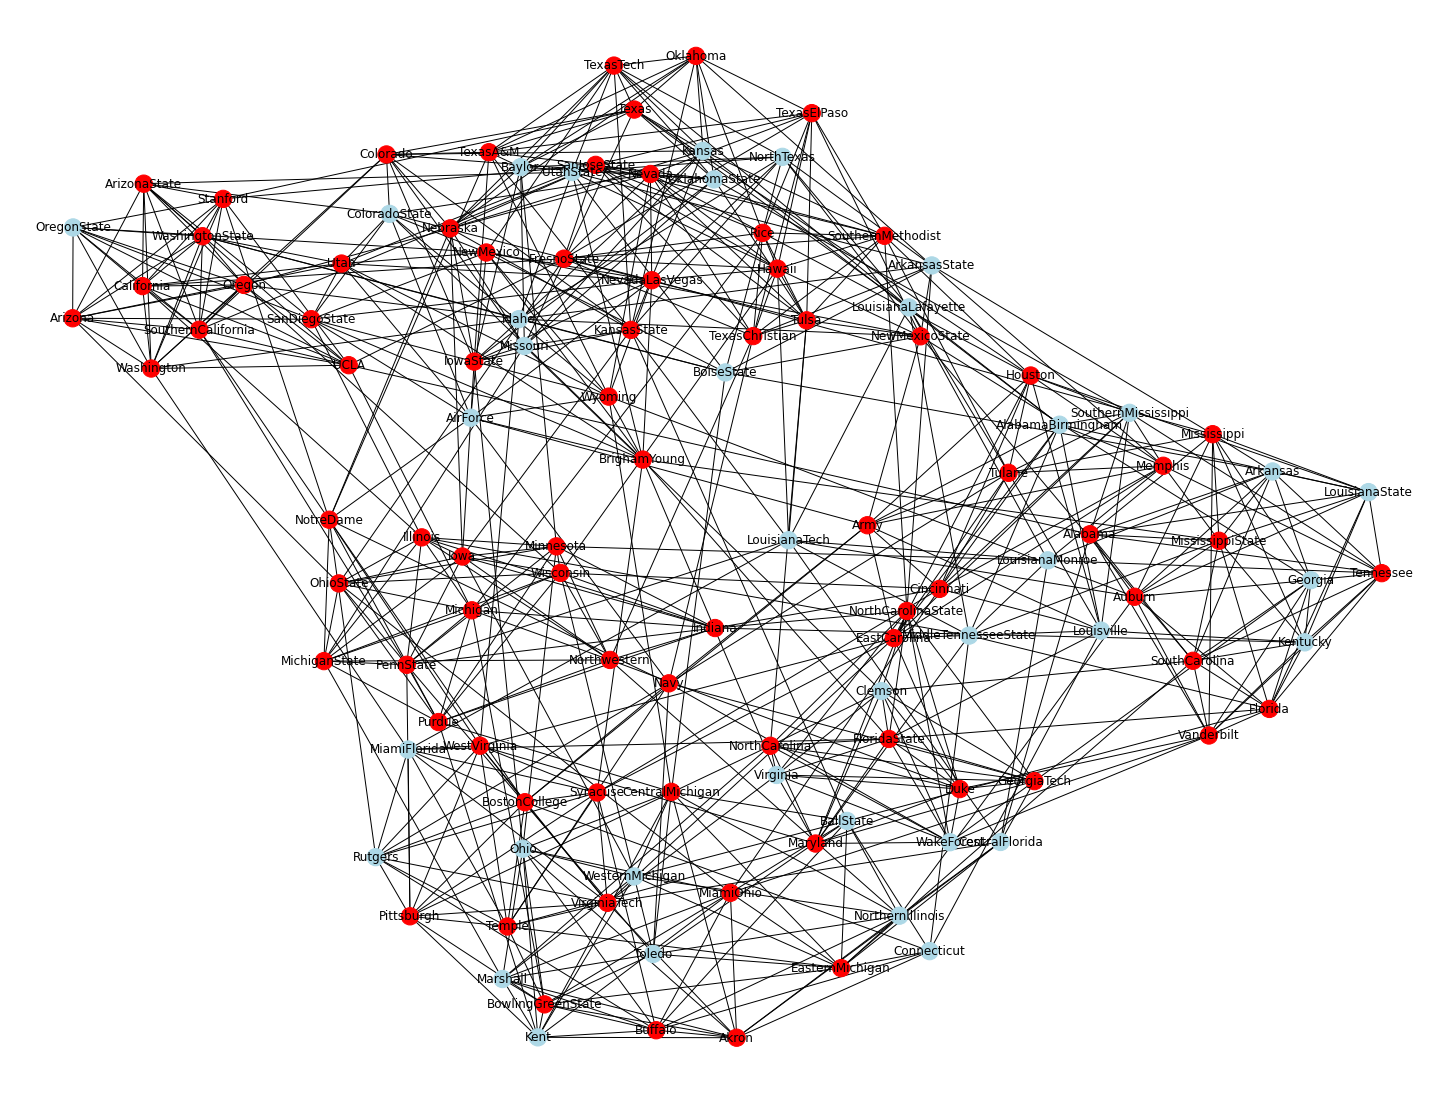

In [60]:
#Visualizing the network using NetworkX library and coloring the nodes in realationship to their degree

Colors= ["lightblue" if g.degree(i) == 7 or g.degree(i) == 8 or g.degree(i) == 9 or g.degree(i) == 10 else "red" for i in  g.nodes]
fig = plt.figure(figsize=(20, 15))
nx.draw(g,with_labels=True, node_color= Colors)

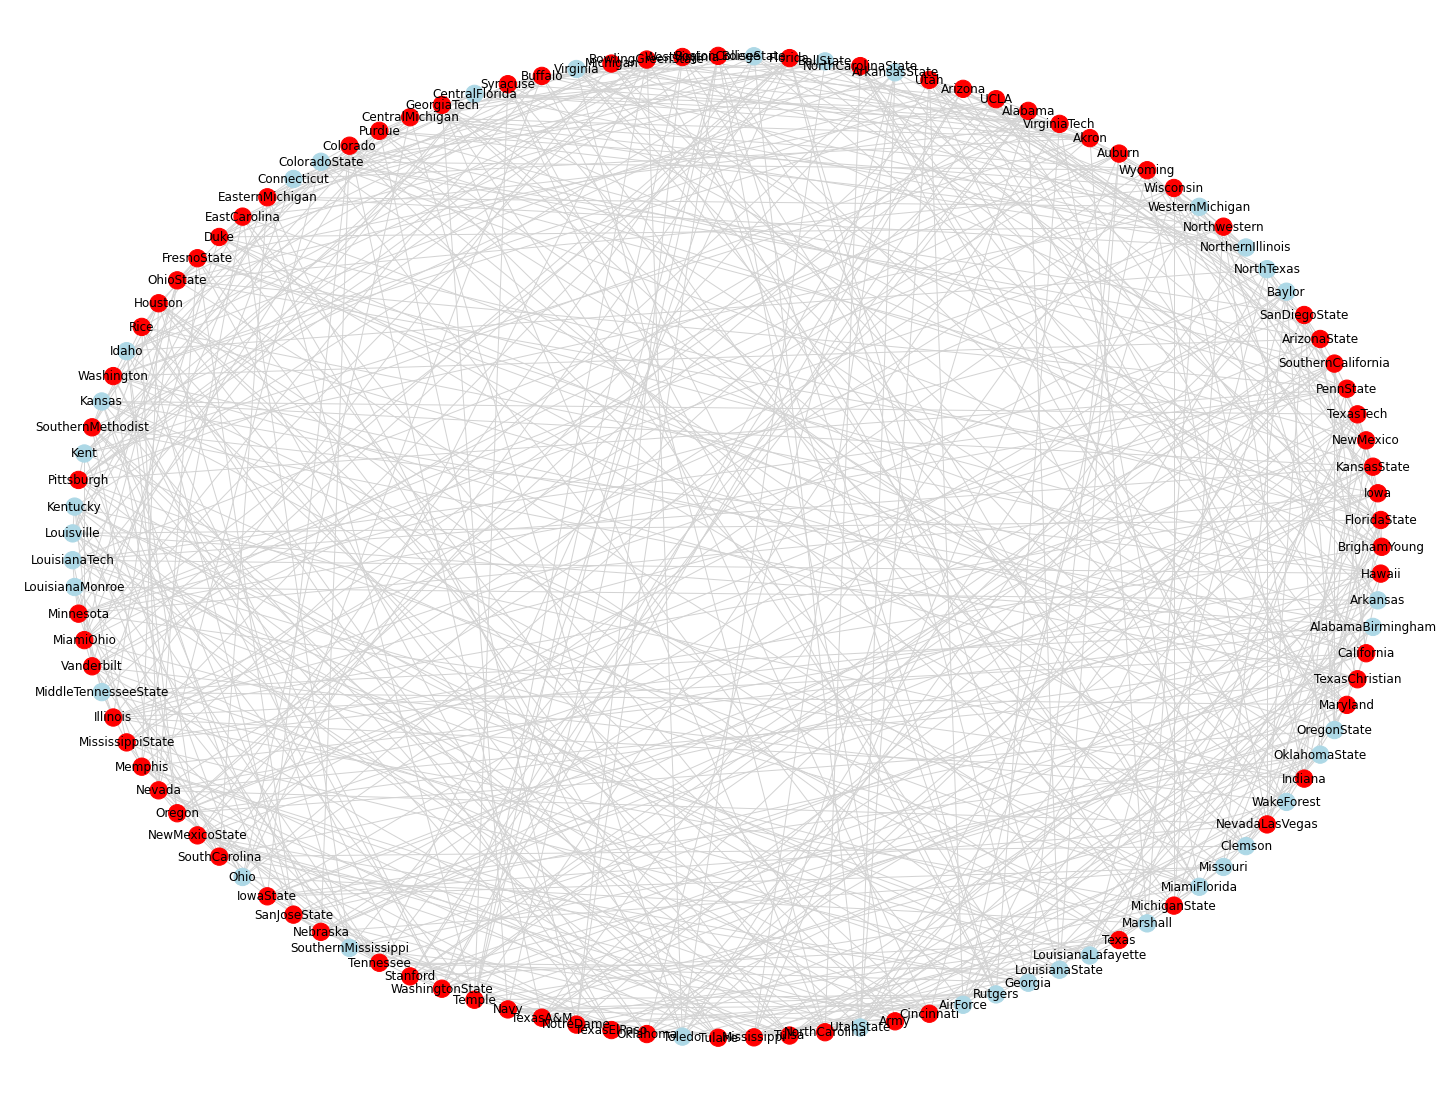

In [61]:
fig = plt.figure(figsize=(20, 15))
nx.draw_circular(g, with_labels=True, node_color = Colors,  edge_color = "lightgrey")

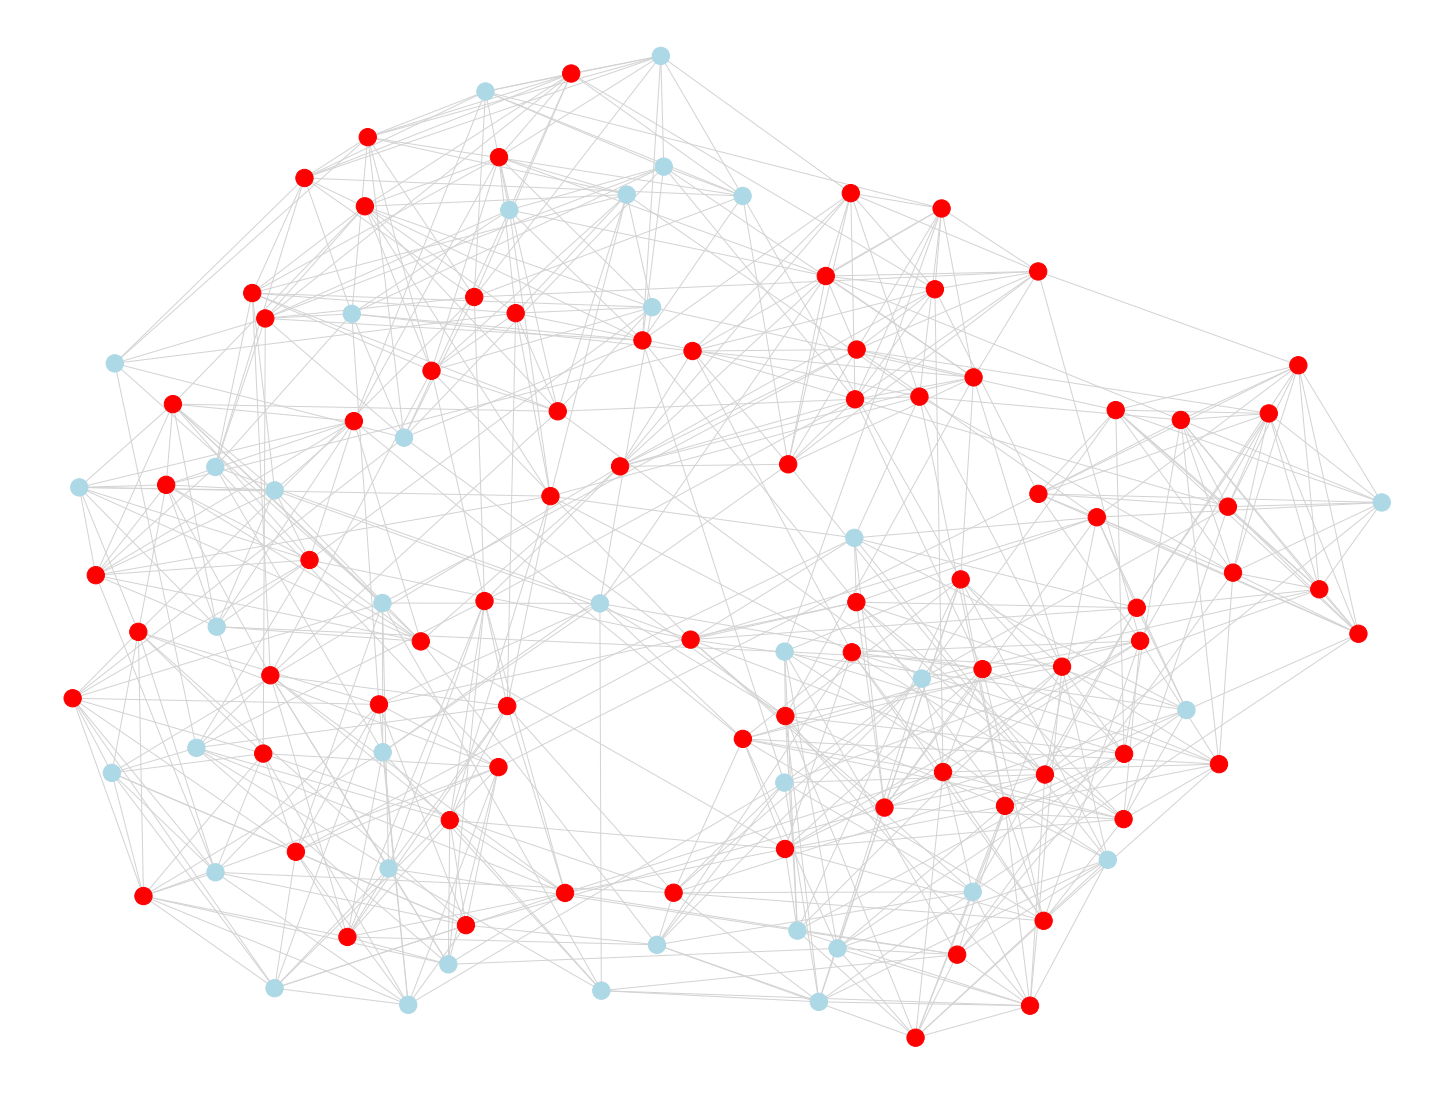

In [79]:
#Applying a Kamada-Kawai force-directed layout
fig = plt.figure(figsize=(20, 15))
nx.draw_kamada_kawai(g, node_color = Colors, edge_color = "lightgrey")

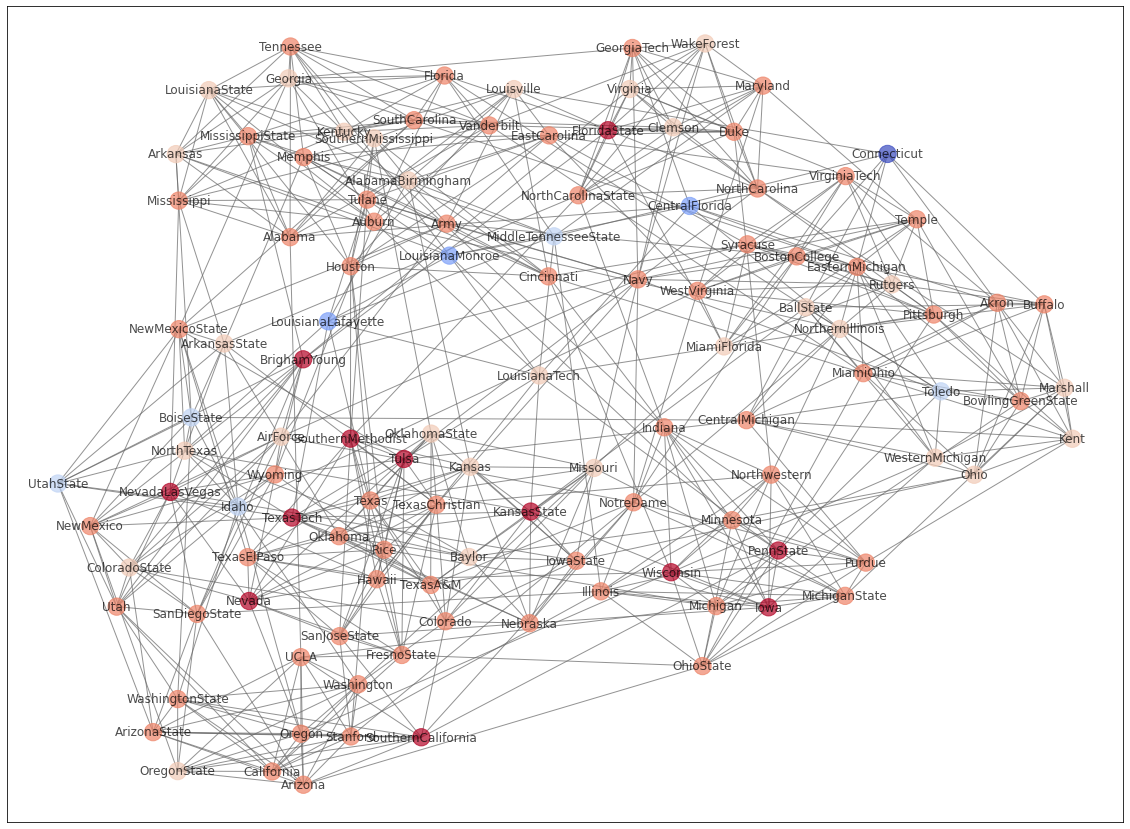

In [63]:
# Plotting the network with the node's color and size which based on its degree 
np.random.seed(123)
node_color2 = np.fromiter(degree_centrality.values(), float)
fig = plt.figure(figsize=(20, 15))
nx.draw_networkx(g, 
                 node_color=node_color2, alpha=0.7, 
                 with_labels=True, edge_color='0.4', cmap='coolwarm', )

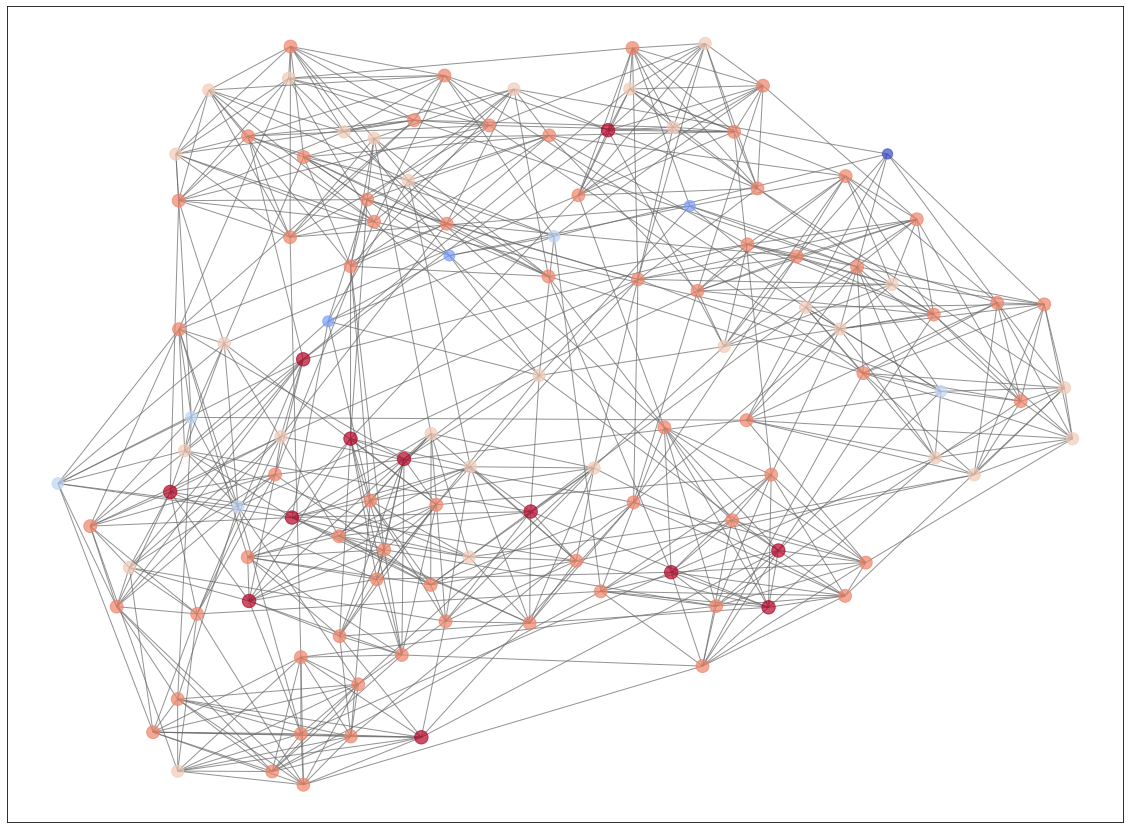

In [64]:
# Plotting the network where the nodes have a color and size which depends on the degree 
np.random.seed(123)

node_color = [g.degree(v) for v in g]

node_size = [15*g.degree(v) for v in g]
fig = plt.figure(figsize=(20, 15))
nx.draw_networkx(g, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False,
                edge_color='0.4', cmap='coolwarm')

In [65]:
edge_style_def = dict(color = 'gray', width = 0.5)  # define the default style for edges
node_style_def = dict(symbol = 'circle', size = 5, opacity = 0.9, 
                      color = 'blue', line = dict(color = 'rgb(0,0,0)', width = 0.5))   # define the default style for nodes

In [66]:
def set_layout(g, ndim = 2, kamada = True):    
    layout = nx.kamada_kawai_layout(g, dim = ndim) if kamada else nx.spring_layout(g, dim = ndim) # define the node layout with NetworkX
    edgelist = list(g.edges())
    
    # Extract coordinates
    ax_nodes = pd.DataFrame(layout).transpose() 
    ax_nodes.columns = ['X', 'Y'] if ndim == 2 else ['X', 'Y', 'Z'] # 2D or 3D?
    
    
    # define layout for edges
    if ndim == 2:
        layout_e = dict(map(lambda e: 
                (e, # edge key
                ([layout[e[0]][0], layout[e[1]][0], None],  # X
                [layout[e[0]][1], layout[e[1]][1], None])  # Y
                ), edgelist))
    else:
        layout_e = dict(map(lambda e: 
            (e, # edge key
            ([layout[e[0]][0], layout[e[1]][0], None], # X
            [layout[e[0]][1], layout[e[1]][1], None],  # Y
            [layout[e[0]][2], layout[e[1]][2], None])  # Z
            ), edgelist))
    
    
    # extract coordinates
    ax_edges = pd.DataFrame(layout_e).transpose()
    ax_edges.columns = ['X', 'Y'] if ndim == 2 else ['X', 'Y', 'Z']

    return ax_nodes, ax_edges


In [67]:
list0=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]

for i in g.nodes:
    if g.nodes[i]['value']==0:
        list0.append(i)
    elif g.nodes[i]['value']==1:
        list1.append(i)
    elif g.nodes[i]['value']==2:
        list2.append(i)
    elif g.nodes[i]['value']==3:
        list3.append(i)
    elif g.nodes[i]['value']==4:
        list4.append(i)
    elif g.nodes[i]['value']==5:
        list5.append(i)
    elif g.nodes[i]['value']==6:
        list5.append(i)
    elif g.nodes[i]['value']==7:
        list7.append(i)
    elif g.nodes[i]['value']==8:
        list8.append(i)
    elif g.nodes[i]['value']==9:
        list9.append(i)
    elif g.nodes[i]['value']==10:
        list10.append(i)
    elif g.nodes[i]['value']== 11:
        list11.append(i)

communities=[list0, list1, list2 ,list3, list4, list5 ,list6, list7, list8 ,list9, list10, list11]

In [68]:
def set_trace(X, Y, kind, style, name, Z = None, text = None): #draw nodes or edges
    mode = 'markers' if kind == 'node' else 'lines'
    hoverinfo = 'text' if kind == 'node' else 'none'
    if Z is None:
        if kind == 'node':
            return go.Scatter(x = X, y = Y, mode = mode, name = name, marker = style, text = text, hoverinfo = hoverinfo)  # draw nodes (i.e., markers) in 2D
        else:
            return go.Scatter(x = X, y = Y, mode = mode, name = name, line = style, text = text, hoverinfo = hoverinfo)  # draw edges (i.e., lines) in 2D
    else: 
        if kind == 'node':
            return go.Scatter3d(x = X, y = Y, z = Z, mode = mode, marker = style,  text = text, name = name, hoverinfo = hoverinfo)  # draw nodes (i.e., markers) in 3D
        else:
            return go.Scatter3d(x = X, y = Y, z = Z, mode = mode, line = style,  text = text, name = name, hoverinfo = hoverinfo)  # draw edges (i.e., lines) in 3D

    
def set_traces(nodes_ax: pd.DataFrame, edges_ax: pd.DataFrame, communities = communities):  # Function to set up the main figure with nodes, edges, and communities
    traces = []
    Xe = list(chain(*edges_ax.X.tolist())) 
    Ye = list(chain(*edges_ax.Y.tolist()))
    Ze = list(chain(*edges_ax.Z.tolist())) if 'Z' in edges_ax.columns else None

    traces.append(set_trace(Xe, Ye, Z = Ze, kind = 'edge', style = edge_style_def, name = 'Link'))
    
    if communities is None:
        traces.append(set_trace(nodes_ax.X.tolist(), nodes_ax.Y.tolist(), 
                                Z = nodes_ax.Z.tolist() if 'Z' in nodes_ax.columns else None, 
                                kind = 'node', style = node_style_def, 
                                name = 'College', text = nodes_ax.index))
    else:
        colors = list(sns.color_palette(n_colors =len(communities)).as_hex())
        for idcom, community in enumerate(communities):
            node_style = node_style_def.copy()
            node_style['color'] = colors[idcom]
            temp = nodes_ax[nodes_ax.index.isin(community)]
            traces.append(set_trace(temp.X.tolist(), temp.Y.tolist(), 
                                Z = temp.Z.tolist() if 'Z' in temp.columns else None, 
                                kind = 'node', style = node_style, 
                                name = 'Conference '+str(idcom), text = temp.index))
            
                                       
    return traces


In [69]:
def draw_plotly_network(net, ndim = 2, communities = None, kamada = True):  # Main function to draw a network
    nodes_ax, edges_ax = set_layout(net, ndim = ndim, kamada = kamada)  # the kamada parameter sets the Networkx layout to use. The ndim parameter sets the dimensions the layout (i.e., 2D or 3D)
    traces = set_traces(nodes_ax, edges_ax, communities)  # the kamada parameter set the Networkx layout to use.
    pyo.iplot(traces, filename = 'basic-line')  # Plot the the network
    

In [70]:
draw_plotly_network(g) # Draw the network using the Kamada Kawai layout

In [71]:
draw_plotly_network(g, kamada = False) # Draw the network using the Spring layout

In [72]:
draw_plotly_network(g, ndim = 3) # Draw the network using the Kamada Kawai 3D layout

In [73]:
draw_plotly_network(g, ndim = 3, kamada = False)  # Draw the network using the 3D Spring layout

In [74]:
comm_mod = community.greedy_modularity_communities(g)  # Detect communities using a Modularity Optimization algorithm
draw_plotly_network(g, communities = communities)   # Draw the network using the Kamada Kawai 2D layout

In [75]:
draw_plotly_network(g, communities = communities, kamada = False)  # Draw the network using the Spring 2D layout

In [76]:
draw_plotly_network(g, ndim = 3, communities = communities)  # Draw the network using the Kamada Kawai 3D layout

In [78]:

draw_plotly_network(g, ndim = 3, communities = communities, kamada = False)  # Draw the network using the Spring 3D layout
